In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../')
import ising_analysis
import importlib
importlib.reload(ising_analysis)

<module 'ising_analysis' from '/Users/ecasiano/Desktop/IsingConvolutionalRBM/ising_analysis.py'>

### Check equilibration of Monte Carlo samples

In [3]:
throwaway = 160000

In [11]:
L = 128
T = 1.0
J1 = -1.0
J2 = 0.0

kernel_dims = [2,2]

In [12]:
# Open file for writing
filename = "./data_nnn/L_"+str(L)+"_T_"+str(T)+"_J1_"+str(J1)+"_J2_"+str(J2)+"_kernelDims_"+str(kernel_dims[0])+"-"+str(kernel_dims[1])+"_no_symmetries_no_regu.dat"

In [13]:
filename

'./data_nnn/L_128_T_1.0_J1_-1.0_J2_0.0_kernelDims_2-2_no_symmetries_no_regu.dat'

In [14]:
data_correlated_CRBM_E = np.loadtxt(filename)[:,0][throwaway:]
data_correlated_CRBM_M = np.loadtxt(filename)[:,1][throwaway:]

In [15]:
num_samples_CRBM = data_correlated_CRBM_E.shape[0]
num_samples_CRBM

340000

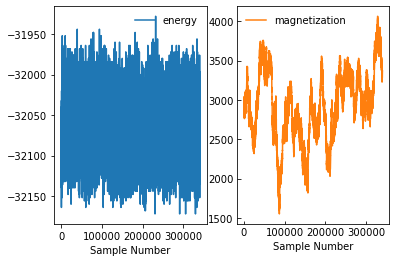

In [16]:
fig,ax = plt.subplots(nrows=1,ncols=2)
ax[0].plot(np.arange(num_samples_CRBM),data_correlated_CRBM_E,color="tab:blue",alpha=1.0,label="energy")
ax[0].set_ylabel(r"")
ax[0].set_xlabel(r"Sample Number")
ax[0].legend(frameon=False)

ax[1].plot(np.arange(num_samples_CRBM),data_correlated_CRBM_M,color="tab:orange",alpha=1.0,label="magnetization")
ax[1].set_ylabel(r"")
ax[1].set_xlabel(r"Sample Number")
ax[1].legend(frameon=False)

plt.tick_params(direction="in")

In [17]:
e_exact = ising_analysis.e_exact_func(T)
e_exact

-1.9971602041122514

In [18]:
e_CRBM = np.mean(data_correlated_CRBM_E)/L**2
e_CRBM

-1.9575049994973575

In [19]:
relErr_E = np.abs((e_exact-e_CRBM)/e_exact)
relErr_E

0.01985579551066654

In [20]:
m_exact = np.nan_to_num(ising_analysis.m_exact_func(T))
m_exact

0.9992757519570612

In [21]:
m_CRBM = np.mean(data_correlated_CRBM_M)/L**2
m_CRBM

0.17831655147776884

In [22]:
relErr_M = np.abs((m_exact-m_CRBM)/m_exact)
relErr_M

0.8215542095076964